# (4주차) 9월26일 
> 산점도 응용예제 4 (무상관과 독립), 산점도 응용예제 5 (qqplot) 

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### 예시1: 무상관, 독립

`-` 아래와 같은 자료를 고려하자. 

In [49]:
np.random.seed(43052)
x1=np.random.uniform(low=-1,high=1,size=100000)
y1=np.random.uniform(low=-1,high=1,size=100000)

Text(0.5, 1.0, 'rect')

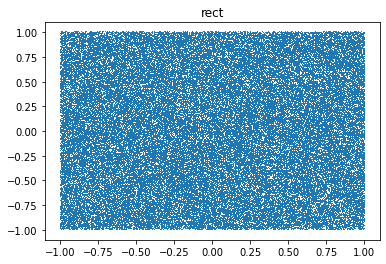

In [50]:
plt.plot(x1,y1,',')
plt.title('rect')

In [51]:
np.corrcoef(x1,y1)

array([[1.        , 0.00521001],
       [0.00521001, 1.        ]])

### 예시2: 무상관, 독립X

`-` 예제자료 만들기..

In [52]:
np.random.seed(43052)
_x=np.random.uniform(low=-1,high=1,size=100000)
_y=np.random.uniform(low=-1,high=1,size=100000)

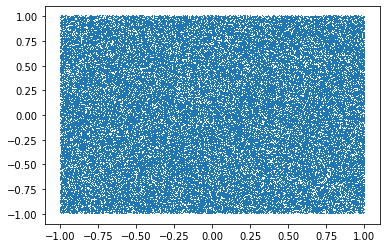

In [53]:
plt.plot(_x,_y,',')

In [54]:
radius = _x**2+_y**2 

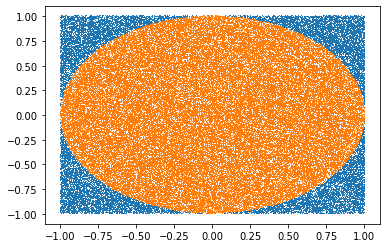

In [55]:
x2=_x[radius<1]
y2=_y[radius<1]
plt.plot(_x,_y,',')
plt.plot(x2,y2,',')

`-` 아래와 같이 자료를 관측했다고 하자. 

Text(0.5, 1.0, 'circ')

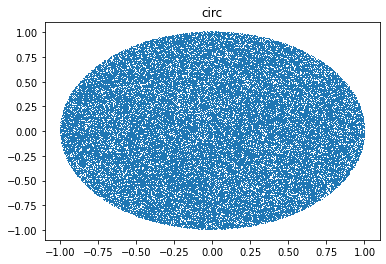

In [56]:
plt.plot(x2,y2,',')
plt.title('circ')

`-` 상관계수는? 

In [57]:
np.corrcoef(x2,y2)

array([[ 1.        , -0.00362687],
       [-0.00362687,  1.        ]])

### 산점도 그림을 보고 (x,y)의 독립여부를 알아내는 방법 

`-` 예제1,2에서 아래의 과정을 고려해보자

(1) $X\in [-h,h]$일 경우 $Y$의 분포를 생각해보자. 그리고 히스토그램을 그려보자. 

(2) $X\in [0.9-h,0.9+h]$일 경우 $Y$의 분포를 생각해보자. 그리고 히스토그램을 그려보자. 

(3) (1)-(2)를 비교

`-` 예제1,2 그림

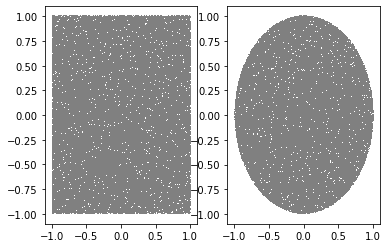

In [226]:
fig, ax = plt.subplots(1,2)
ax[0].plot(x1,y1,',',color='gray')
ax[1].plot(x2,y2,',',color='gray')

`-` $X \in [0.9-h, 0.9+h]$? 

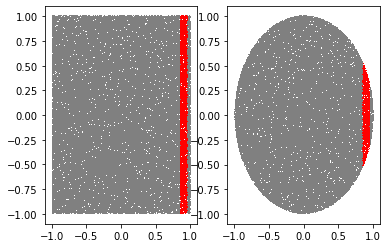

In [227]:
h=0.05
k=0.9
## 예제1 
idx = (x1>k-h)*(x1<k+h)
x1_red = x1[idx] 
y1_red = y1[idx]
ax[0].plot(x1_red,y1_red,',r') 

## 예제2
idx = (x2>k-h)*(x2<k+h)
x2_red = x2[idx] 
y2_red = y2[idx]
ax[1].plot(x2_red,y2_red,',r') 

fig

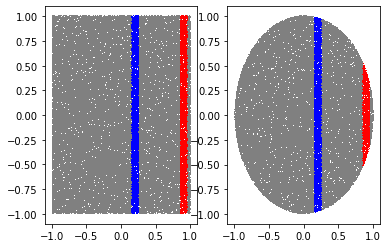

In [228]:
h=0.05
k=0.2
## 예시1 
idx = (x1>k-h)*(x1<k+h)
x1_blue = x1[idx] 
y1_blue = y1[idx]
ax[0].plot(x1_blue,y1_blue,',b') 

## 예시2
idx = (x2>k-h)*(x2<k+h)
x2_blue = x2[idx] 
y2_blue = y2[idx]
ax[1].plot(x2_blue,y2_blue,',b') 

fig

`-` 붉은점들과 푸른점들의 히스토그램?!

(예시1)

(array([499., 530., 481., 524., 525., 535., 493., 473., 552., 469.]),
 array([-9.99822801e-01, -7.99884885e-01, -5.99946968e-01, -4.00009052e-01,
        -2.00071135e-01, -1.33218589e-04,  1.99804698e-01,  3.99742615e-01,
         5.99680531e-01,  7.99618448e-01,  9.99556364e-01]),
 <BarContainer object of 10 artists>)

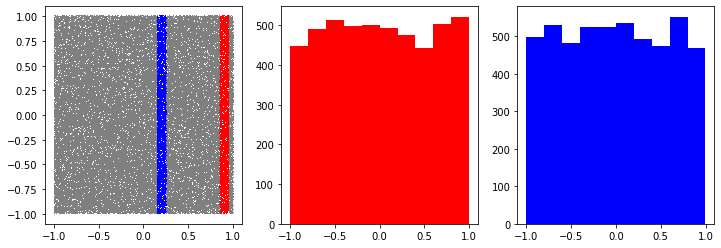

In [230]:
fig, ax = plt.subplots(1,3,figsize=(12,4)) 
ax[0].plot(x1,y1,',',color='gray'); ax[0].plot(x1_red,y1_red,',r'); ax[0].plot(x1_blue,y1_blue,',b'); 
ax[1].hist(y1_red,color='red')
ax[2].hist(y1_blue,color='blue')

(예시2)

(-1.0, 1.0)

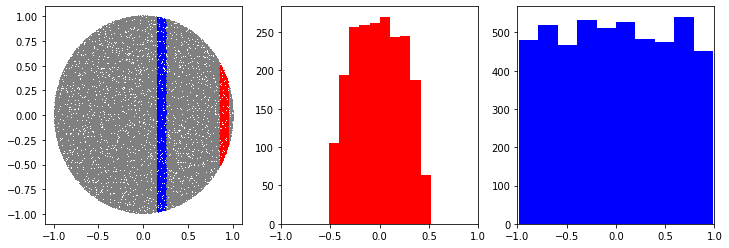

In [233]:
fig, ax = plt.subplots(1,3,figsize=(12,4)) 
ax[0].plot(x2,y2,',',color='gray'); ax[0].plot(x2_red,y2_red,',r'); ax[0].plot(x2_blue,y2_blue,',b'); 
ax[1].hist(y2_red,color='red'); ax[1].set_xlim(-1,1)
ax[2].hist(y2_blue,color='blue'); ax[2].set_xlim(-1,1)

### 예시3

In [234]:
np.random.seed(43052)
x=np.random.normal(size=10000)
y=np.random.normal(size=10000)

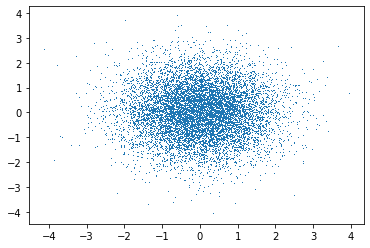

In [235]:
plt.plot(x,y,',')

In [236]:
np.corrcoef(x,y)

array([[ 1.        , -0.01007718],
       [-0.01007718,  1.        ]])

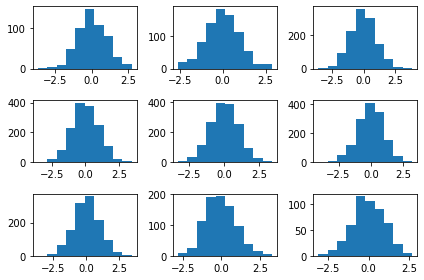

In [240]:
h=0.2
k=np.linspace(-1.5,1.5,9)
fig, _ = plt.subplots(3,3)
for i in range(9):
    fig.axes[i].hist(y[(x>k[i]-h) * (x<k[i]+h)])
fig.tight_layout()